In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import Image, HTML
import re
from IPython.core.display import display, HTML, Javascript
from string import Template
import pandas as pd
import numpy as np
import json
import IPython.display
%matplotlib inline
py.init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('CompleteDataset.csv', encoding='utf-8')
data = data.drop(data.columns[0], axis = 1)

In [3]:
def in_preferred_position(list_pos, pos):
    if pos in list_pos:
        return True
    return False

# Data Cleaning

In [4]:
# Converting preferred positions to a list
data['Preferred Positions'] = list(map(lambda x: x.split(), data['Preferred Positions']))

In [5]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

data['Value'] = data['Value'].apply(lambda x: str2number(x))
data['Wage'] = data['Wage'].apply(lambda x: str2number(x))

In [6]:
data.apply(pd.to_numeric, errors='coerce')
def convert_to_float(x):
    if len(x.split('+')) > 1:
        return float(x.split('+')[0])
    if len(x.split('-')) > 1:
        return float(x.split('-')[0])
    else:
        return float(x)

a = [ 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

for p in a:
    data[p] = list(map(convert_to_float, data[p]))

In [7]:
mapping = {'ST': 'Attack', 'RW': 'Attack', 'LW': 'Attack', 'RM': 'Midfield', 'CM': 'Midfield', 'LM': 'Midfield', 'CAM': 'Midfield', 'CF': 'Midfield', 'CDM': 'Midfield', 'CB': 'Defence', 'LB': 'Defence', 'RB': 'Defence', 'RWB': 'Defence', 'LWB': 'Defence', 'GK': 'Goalkeeper'}

# for position in mapping.keys(): 
#     data[[in_preferred_position(x, position) for x in data['Preferred Positions']]]
    
for index, row in data.iterrows():
    data.loc[index, 'FieldPosition'] = mapping[row['Preferred Positions'][0]]

In [8]:
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [9]:
#Creating a function that assigns continent to each country
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

data['Continent'] = data['Nationality'].apply(lambda x: find_continent(x, continents))

# Continent wise distribution

In [35]:
top_1000 = data.sort_values("Overall", ascending=False).reset_index().head(2000)[["Name", "Nationality", "Continent", "Overall", "Club"]]

In [36]:
data_f = {}
data_f["name"] = "DISTRIBUTION OF TOP 1000 PLAYERS ACCORDING TO NATIONALITY"
data_f["children"] = []

# Split dataset into Continents:
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]/20
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data_f["children"].append(continent_dict)


In [37]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.node {
  cursor: pointer;
}
.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}
.node--leaf {
  fill: white;
}
.label {
  font: 8px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}
.label,
.node--root,
.node--leaf {
  pointer-events: none;
}
</style>
<svg width="800" height="800"></svg>
"""


In [38]:
js_string="""
require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
});

require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolateViridis)
    .domain([-4, 4]);
var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);
d3.json("output.json", function(error, root) {
  if (error) throw error;

root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

var focus = root,
      nodes = pack(root).descendants(),
      view;

var circle = g.selectAll("circle")
        .data(nodes)
        .enter().append("circle")
        .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
        .style("fill", function(d) { return d.children ? color(d.depth) : null; })
        .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
      .data(nodes)
      .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });
   
   var node = g.selectAll("circle,text");
   
   svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });
      
   zoomTo([root.x, root.y, root.r * 2 + margin]);
   
   function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

   transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }
   function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
 });
"""


In [41]:
with open('output.json', 'w') as outfile:  
    json.dump(data_f, outfile)

In [42]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

# Country wise Stats

In [10]:
reordered_cols = []
personal_cols = []
personal_cols = ['ID', 'Name', 'Photo', 'Club', 'Club Logo', 'Preferred Positions', 'Flag', 'Nationality', 'Wage', 'Value']
reordered_cols = personal_cols + [col for col in data if (col not in personal_cols)]
data = data[reordered_cols]

In [11]:
country_data = data.iloc[:, 6:]
country_data.iloc[:, 2:] = country_data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

In [12]:
agg_dict = {}
agg_dict = {'Flag': ['min']}
for col in country_data.columns[2:]:
    agg_dict[col] = ['mean', 'max', 'min', 'size']
group_by_country = country_data.groupby(['Nationality'])
country_stats = group_by_country.agg(agg_dict)
country_stats[('Flag', 'min')] = '<img src="' + country_stats[('Flag', 'min')] + '">'
HTML(country_stats.head(10).to_html(escape=False))

In [13]:
def create_trace(feature, basic_stat, is_visible):
    trace = go.Choropleth(
        locations= country_stats.index,
        locationmode= 'country names',
        z= country_stats[(feature, basic_stat)],
        text= country_stats[(feature, 'size')],
        visible = is_visible,
        colorscale = [
            [0.0,"rgb(25, 100, 255)"],[0.2,"rgb(25, 175, 255)"],[0.4,"rgb(25, 255, 255)"],
            [0.6,"rgb(25, 255, 175)"],[0.8,"rgb(25, 255, 100)"],[1.0,"rgb(25, 255, 25)"]
            ],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            #autotick = True,
            tickprefix = '',
            outlinecolor = "rgba(68, 68, 68, 0)",
            #dtick = 2,
            title = feature + '<br>' + basic_stat)
    )
    return trace

In [14]:
trace_data = []
buttons= []
is_visible = True
features = country_data.columns[2:]
stats = ['mean', 'max', 'min']
n = len(features) * len(stats)
nth_feature = 0
nth_stat = 0

for stat in stats:
    for feature in features:
        trace_data.append(create_trace(feature, stat, is_visible))
        is_visible = False
        
        pre_false = [False]*nth_feature
        post_false = [False]*(n-nth_feature-1)
        button = dict(
            label= feature + ' - ' + stat,
            method= 'update',
            args=[
                {'visible': pre_false + [True] + post_false},
                {'title': 'FIFA 2018 Statistics (' + feature + ' - ' + stat + ')'}
            ]
        )
        buttons.append(button)
        nth_feature += 1
        
updatemenus = list([
    dict(
        #type="buttons",
        direction='down',
        active=-1,
        xanchor='left',
        x=0,
        yanchor = 'top',
        y=1.065,
        showactive = True,
        buttons=buttons
    )
])

annotations = list([
    dict(text='(Feature - Stat):',
         x=0,
         y=1.12, 
         yref='paper',
         align='left',
         showarrow=False)
])

layout = dict(
    title = 'FIFA 2018 Statistics (' + features[0] + ' - ' + stats[0] + ')' ,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    ),
    showlegend=False,
    updatemenus=updatemenus,
    annotations=annotations
)

fig = dict( data=trace_data, layout=layout )
py.iplot( fig, validate=False, filename='fifa-2018-world-map' )

# Dream Team

In [15]:
def get_best_squad(formation, data, club='', country=''):
    df = data.copy()
    squad = []
    if country:
        df = df[df['Nationality'] == country.title()]
    if club:
        df = df[df['Club'] == club.title()]
    for position in formation:
        if (position == 'GK'):
            g = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            g = g.sort_values('Overall', ascending=False)
            player = g.iloc[0][['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]
            position_rating = player['Overall']
        else:
            ng = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            if ng.empty:
                ng = df
            ng = ng.sort_values(str(position), ascending=False)
            player = ng.iloc[0]
            position_rating = player[position]
            player = player[['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]   
        player['Position'] = str(position)
        player['Position Rating'] = position_rating
        squad.append(player)
        df = df[df['ID'] != player['ID']]
    squad = pd.DataFrame(np.array(squad).reshape(11,7), columns = ['ID','Name', 'Nationality', 'OVR', 'Preferred Positions', 'Position', 'Rating'])
    return squad

In [16]:
squad_433 = ['GK', 'LWB', 'LCB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
s = get_best_squad(squad_433, data, country='', club='')
s[['Name', 'Rating', 'Position', 'Nationality']]

Name Rating Position Nationality
0            M. Neuer     92       GK     Germany
1             D. Rose     81      LWB     England
2        Sergio Ramos     87      LCB       Spain
3        G. Chiellini     86       CB       Italy
4         Azpilicueta     84       RB       Spain
5          A. Sánchez     85       LM       Chile
6            A. Vidal     85      CDM       Chile
7        K. De Bruyne     85       RM     Belgium
8   Cristiano Ronaldo     91       LW    Portugal
9           L. Suárez     88       ST     Uruguay
10           L. Messi     91       RW   Argentina

# Age vs Overall (with hue)

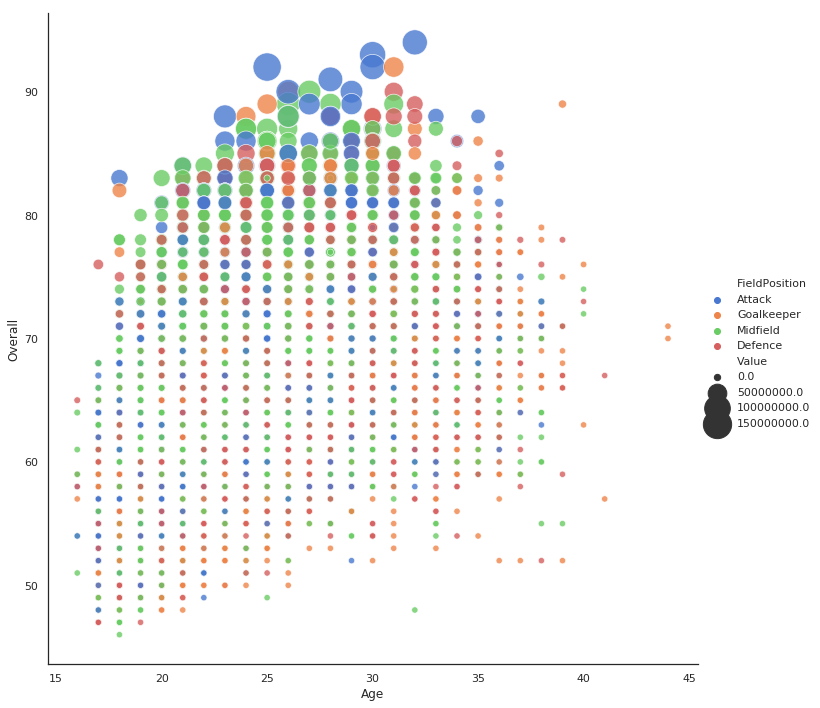

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Load the example mpg dataset
mpg = data

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Age", y="Overall", hue="FieldPosition", size="Value",
            sizes=(40, 800), alpha=0.8, palette="muted",
            height=10, data=mpg)

# Top 10 Countries Overall Boxplot

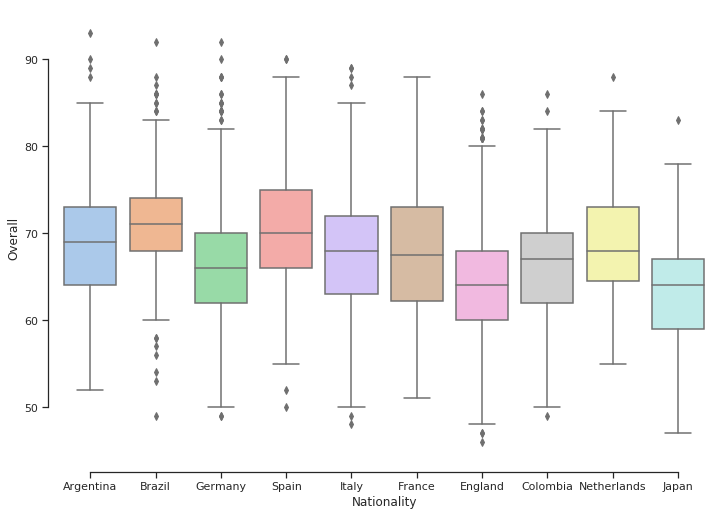

In [18]:
df = data.copy()
sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)


top10 = list(df['Nationality'].value_counts().head(10).index)
d = df.query('Nationality in @top10')
box_overall = sns.boxplot(data = d, y = 'Overall', x = 'Nationality')
sns.despine(offset=10, trim=True)

# Top 10 Countries Potential Boxplot

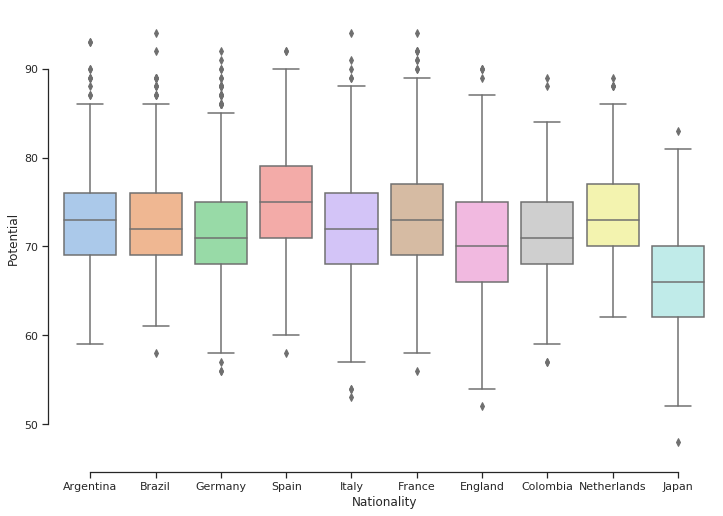

In [19]:
sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

box_potential = sns.boxplot(data = d, y = 'Potential', x = 'Nationality')
sns.despine(offset=10, trim=True)

# Top 10 Clubs Overall Boxplot

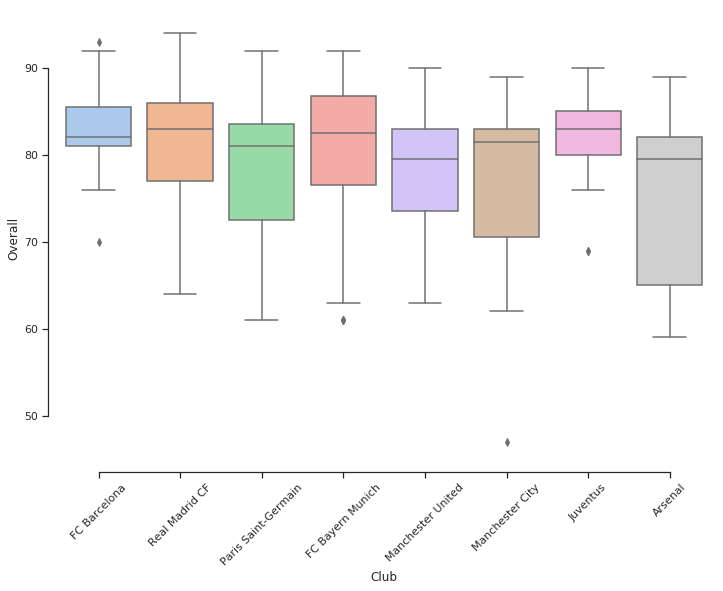

In [20]:
clubs = ['FC Barcelona', 'Real Madrid CF', 'Arsenal', 'FC Bayern Munich', 'Manchester United', 'Juventus', 'Manchester City', 'Paris Saint-Germain']
c = data.query('Club in @clubs')

sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

box_wage = sns.boxplot(data = c, y = 'Overall', x = 'Club')
sns.despine(offset=10, trim=True)
a = plt.setp(ax.get_xticklabels(), rotation=45)

# Top Clubs Potential boxplot

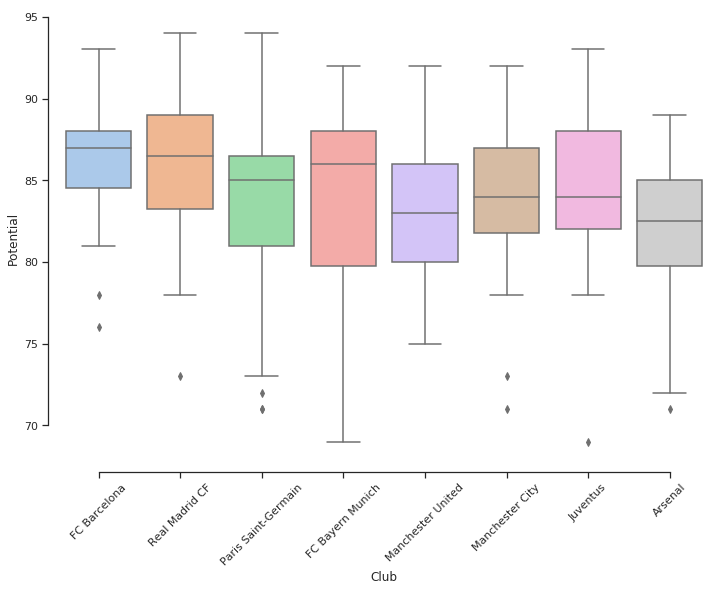

In [21]:
clubs = ['FC Barcelona', 'Real Madrid CF', 'Arsenal', 'FC Bayern Munich', 'Manchester United', 'Juventus', 'Manchester City', 'Paris Saint-Germain']
c = data.query('Club in @clubs')

sns.set(style="ticks", palette="pastel")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

box_wage = sns.boxplot(data = c, y = 'Potential', x = 'Club')
sns.despine(offset=10, trim=True)
a = plt.setp(ax.get_xticklabels(), rotation=45)

# Top Clubs Wage boxplot

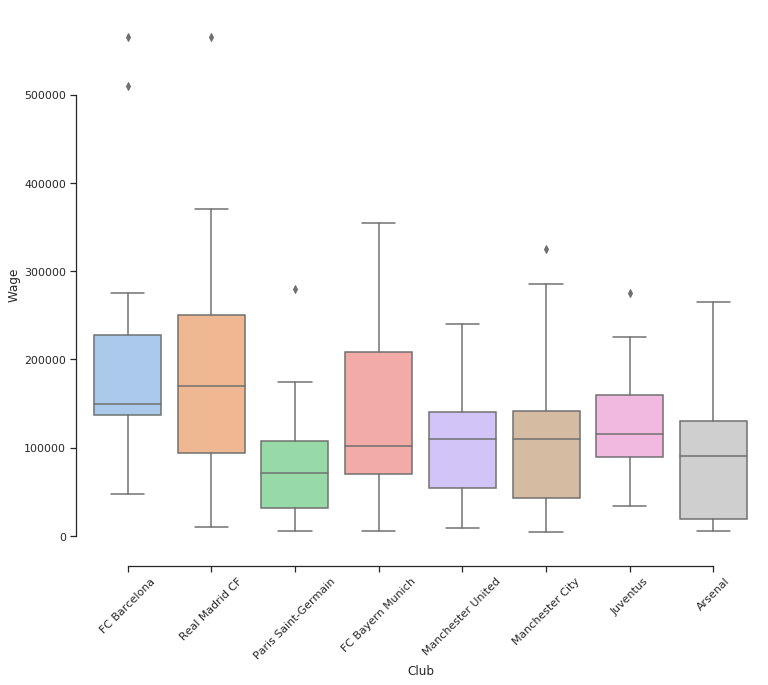

In [22]:
clubs = ['FC Barcelona', 'Real Madrid CF', 'Arsenal', 'FC Bayern Munich', 'Manchester United', 'Juventus', 'Manchester City', 'Paris Saint-Germain']
c = data.query('Club in @clubs')

sns.set(style="ticks", palette="pastel")
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)

box_wage = sns.boxplot(data = c, y = 'Wage', x = 'Club')
sns.despine(offset=10, trim=True)
a = plt.setp(ax.get_xticklabels(), rotation=45)

# Top Clubs Wage boxplot

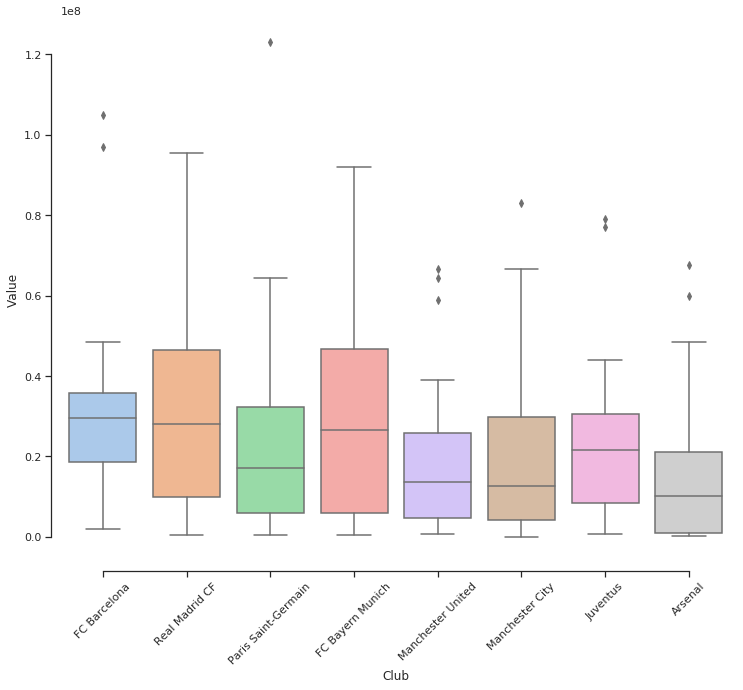

In [23]:
sns.set(style="ticks", palette="pastel")
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
meds = c.median().sort_values()

box_wage = sns.boxplot(data = c, y = 'Value', x = 'Club')
sns.despine(offset=10, trim=True)

a = plt.setp(ax.get_xticklabels(), rotation=45)

# Overall/Potential vs Age

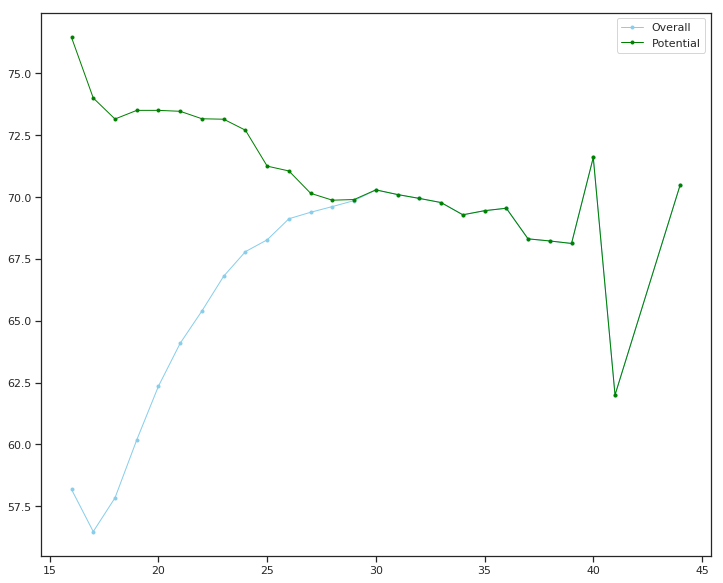

In [24]:
overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())
potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())
merged = pd.merge(overall, potential, on='Age', how='inner')
merged['Age']= merged.index
fig, ax = plt.subplots(figsize=a4_dims)
merged.reset_index(drop = True, inplace = True)
p = plt.plot('Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=1, label ="Overall" )
p = plt.plot('Age', 'Potential', data=merged, marker='.', color='green', linewidth=1, label = "Potential")
p = plt.legend()

# Correlation matrix for all numeric attributes

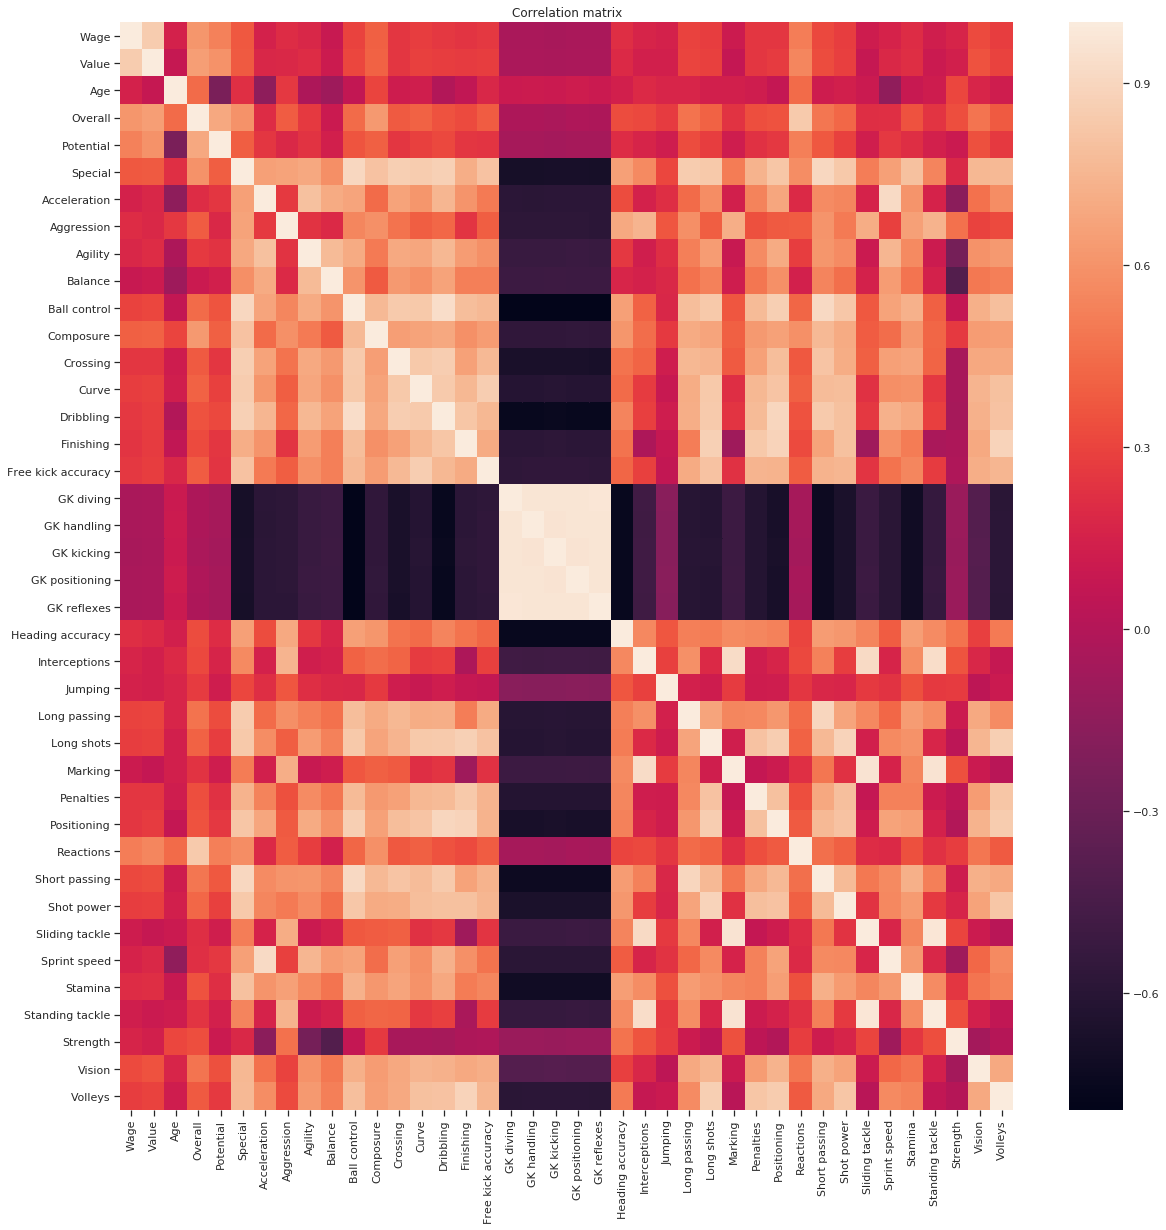

In [25]:
L = list(range(8,48))
df = data.iloc[ :, L]
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
ax = sns.heatmap(df.corr()).set_title('Correlation matrix')

# Player Age vs Average Value

In [26]:
data_top1000 = data
# Grouping the data by Age as index and displaying Value and Wage as per age groups  
age_wagevalue = data_top1000[data_top1000.Age<=38].groupby(['Age']).agg({'Wage': 'mean', 'Value': 'mean'})      

# Plotting Value over Age with Line and Bar
                                   
data_plot1 = [
    go.Scatter(
        x=age_wagevalue.index, 
        y=age_wagevalue['Value'],
        marker = dict(
          color = 'rgb(0,0,153)'
        ),
                name = "Average Player Value as Line"
            ),
    go.Bar(
        x = age_wagevalue.index,
        y=age_wagevalue['Value'],
        base = 0,
        marker = dict(
          color = 'rgb(51,153,255)'
        ),
                name = "Average Player Value as Bars"
    )
]

layout_plot1 = go.Layout(
    title='Value of players over Age',
    yaxis=dict(title='Average Player Value in Euros(Millions)'),
    xaxis=dict(title='Player Age')
)

fig1 = go.Figure(data=data_plot1, layout=layout_plot1)
    
py.iplot(fig1)

# Player age vs Wage

In [27]:
data_plot2 = [
    go.Scatter(
        x=age_wagevalue.index, 
        y=age_wagevalue['Wage'],
        marker = dict(
          color = 'rgb(0,204,204)'
        ),
                name = "Average Player Wage as Line"
            ),
    go.Bar(
        x = age_wagevalue.index,
        y=age_wagevalue['Wage'],
        base = 0,
        marker = dict(
          color = 'rgb(0,102,102)'
        ),
                name = "Average Player Wage as Bars"
    )
]

layout_plot2 = go.Layout(
    title='Monthly Wage of players over Age',
    yaxis=dict(title='Average Wage in Euros(Thousands)'),
    xaxis=dict(title='Player Age'),
    )

fig2 = go.Figure(data=data_plot2, layout=layout_plot2)
    
py.iplot(fig2,filename ='Monthly Wage of players over Age.html')



In [28]:
# Violin Plot for Value over Age
data_plot3 = []
for i in range(0,len(pd.unique(data_top1000['Age']))):
    trace = {
            "type": 'violin',
            "x": data_top1000['Age'][data_top1000['Age'] == pd.unique(data_top1000['Age'])[i]],
            "y": data_top1000['Value'][data_top1000['Age'] == pd.unique(data_top1000['Age'])[i]],
            "name": pd.unique(data_top1000['Age'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data_plot3.append(trace)

        
fig3 = {
    "data": data_plot3,
    "layout" : {
        "title": "Distribution of Player Value over Player Age",
        "yaxis": {
            "zeroline": False,
            "title":"Player Value in Euros (Millions)" 
        },
        "xaxis": {
                "title":"Player Age"}
    }
}

py.iplot(fig3, validate = False)

In [29]:
# Violin Plot for Wage over Age
data_plot4 = []
for i in range(0,len(pd.unique(data_top1000['Age']))):
    trace = {
            "type": 'violin',
            "x": data_top1000['Age'][data_top1000['Age'] == pd.unique(data_top1000['Age'])[i]],
            "y": data_top1000['Wage'][data_top1000['Age'] == pd.unique(data_top1000['Age'])[i]],
            "name": pd.unique(data_top1000['Age'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data_plot4.append(trace)

        
fig4 = {
    "data": data_plot4,
    "layout" : {
        "title": "Distribution of Player Wage over Player Age",
        "yaxis": {
            "zeroline": False,
        "title":"Wage in Euros (Thousands)" 
        },
        "xaxis": {
                "title":"Player Age"
                }
    }
    }


py.iplot(fig4, filename='Wage_Age_Violin.html', validate = False)

# Player Value distribution by position

In [30]:
CAM = data[[in_preferred_position(x, 'CAM') for x in data['Preferred Positions']]].sort_values('CAM', ascending=False)[:100]
CAM["PPos"] = "Central Attacking Midfielder"

CB = data[[in_preferred_position(x, 'CB') for x in data['Preferred Positions']]].sort_values(by="CB",ascending=False)[:100]
CB["PPos"] = "Center Back"

CDM = data[[in_preferred_position(x, 'CDM') for x in data['Preferred Positions']]].sort_values(by="CDM",ascending=False)[:100]
CDM["PPos"] = "Central Defensive Midfielder"

CF = data[[in_preferred_position(x, 'CF') for x in data['Preferred Positions']]].sort_values(by="CF",ascending=False)[:100]
CF["PPos"] = "Center Forward"

CM = data[[in_preferred_position(x, 'CM') for x in data['Preferred Positions']]].sort_values(by="CM",ascending=False)[:100]
CM["PPos"] = "Central Midfielder"

LB = data[[in_preferred_position(x, 'LB') for x in data['Preferred Positions']]].sort_values(by="LB",ascending=False)[:100]
LB["PPos"] = "Left Back"

LM = data[[in_preferred_position(x, 'LM') for x in data['Preferred Positions']]].sort_values(by="LM",ascending=False)[:100]
LM["PPos"] = "Left Midfielder"

LW = data[[in_preferred_position(x, 'LW') for x in data['Preferred Positions']]].sort_values(by="LW",ascending=False)[:100]
LW["PPos"] = "Left Wing"

LWB = data[[in_preferred_position(x, 'LWB') for x in data['Preferred Positions']]].sort_values(by="LWB",ascending=False)[:100]
LWB["PPos"] = "Left Wing Back"

RB = data[[in_preferred_position(x, 'RB') for x in data['Preferred Positions']]].sort_values(by="RB",ascending=False)[:100]
RB["PPos"] = "Right Back"

RM = data[[in_preferred_position(x, 'RM') for x in data['Preferred Positions']]].sort_values(by="RM",ascending=False)[:100]
RM["PPos"] = "Right Midfielder"

RW = data[[in_preferred_position(x, 'RW') for x in data['Preferred Positions']]].sort_values(by="RW",ascending=False)[:100]
RW["PPos"] = "Right Wing"

RWB = data[[in_preferred_position(x, 'RWB') for x in data['Preferred Positions']]].sort_values(by="RWB",ascending=False)[:100]
RWB["PPos"] = "Right Wing Back"

ST = data[[in_preferred_position(x, 'ST') for x in data['Preferred Positions']]].sort_values(by="ST",ascending=False)[:100]
ST["PPos"] = "Striker"

GK = data[[in_preferred_position(x, 'GK') for x in data['Preferred Positions']]].sort_values(by="Overall",ascending=False)[:100]
GK["PPos"] = "Goal Keeper"

In [31]:
trace1 = go.Box(
    y = LW["Value"],
    name = "Left Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = LM["Value"],
    name = "Left Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = LWB["Value"],
    name = "Left Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)

trace4 = go.Box(
    y = LB["Value"],
    name = "Left Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,102)'),
    line = dict(
        color = 'rgb(0,102,102)')
)      

trace5 = go.Box(
    y = CF["Value"],
    name = "Center Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,102,255)'),
    line = dict(
        color = 'rgb(102,102,255)')
)

trace6 = go.Box(
    y = CAM["Value"],
    name = "Central Attacking Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(51,51,255)'),
    line = dict(
        color = 'rgb(51,51,255)')
)  

trace7 = go.Box(
    y = CM["Value"],
    name = "Central Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,204)'),
    line = dict(
        color = 'rgb(0,0,204)')
)

trace8 = go.Box(
    y = CDM["Value"],
    name = "Central Defensive Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)
    
trace9 = go.Box(
    y = CB["Value"],
    name = "Center Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)    

trace10 = go.Box(
    y = RW["Value"],
    name = "Right Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,128,255)'),
    line = dict(
        color = 'rgb(0,128,255)')
)  

trace11 = go.Box(
    y = RM["Value"],
    name = "Right Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,204)'),
    line = dict(
        color = 'rgb(0,102,204)')
)

trace12 = go.Box(
    y = RWB["Value"],
    name = "Right Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,76,153)'),
    line = dict(
        color = 'rgb(0,76,153)')
)
    
trace13 = go.Box(
    y = RB["Value"],
    name = "Right Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,51,102)'),
    line = dict(
        color = 'rgb(0,51,102)')
)      

trace14 = go.Box(
    y = ST["Value"],
    name = "Striker",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,53)'),
    line = dict(
        color = 'rgb(0,102,53)')
)
    
trace15 = go.Box(
    y = GK["Value"],
    name = "Goal Keeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)    
data_plot = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)
py.iplot(fig, filename = "Value over Position.html")

# Player Value distribution by Field Position

In [32]:
Att = data[data['FieldPosition'] == 'Attack'].sort_values('Overall', ascending=False)[:100]
Mid = data[data['FieldPosition'] == 'Midfield'].sort_values('Overall', ascending=False)[:100]
Def = data[data['FieldPosition'] == 'Defence'].sort_values('Overall', ascending=False)[:100]
Gk = data[data['FieldPosition'] == 'Goalkeeper'].sort_values('Overall', ascending=False)[:100]

In [33]:
trace1 = go.Box(
    y = Att["Value"],
    name = "Attack",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = Mid["Value"],
    name = "Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = Def["Value"],
    name = "Defence",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)
trace4 = go.Box(
    y = Gk["Value"],
    name = "Goalkeeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)

data_plot = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)
py.iplot(fig, filename = "Value over Position.html")

In [34]:
# pip install footballpitchplot
from pitchplotter.plotter import Plotter
# import pandas as pd
# import numpy as np
# import scipy as sp
# import plotly as py
# to not print out warnings in jupyter notebook (NOT FOR OTHER EDITORS)
import warnings
# warnings.simplefilter("ignore")
# py.tools.set_credentials_file(username='c03u5', api_key='tXzPN2S7voIORkdtAEU2')
plotter = Plotter('Demo')
demo_arr = [
    [25,50,'Messi', 10],
    [35,41,'Event 2', 10],
    [20,33,'Event 3', 10],
    [10,52,'Event 4', 10],
    [45,60,'Event 5', 10]
]
plotter.add_events(demo_arr, "Demo events")
plotter.plot()

ModuleNotFoundError: No module named 'pitchplotter'